In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
import keras
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=["Accuracy"])

In [5]:
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.7420 - loss: 1.0217 - val_Accuracy: 0.9047 - val_loss: 0.3516
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - Accuracy: 0.9050 - loss: 0.3455 - val_Accuracy: 0.9211 - val_loss: 0.2886
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Accuracy: 0.9180 - loss: 0.2952 - val_Accuracy: 0.9286 - val_loss: 0.2549
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Accuracy: 0.9308 - loss: 0.2542 - val_Accuracy: 0.9346 - val_loss: 0.2338
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - Accuracy: 0.9334 - loss: 0.2359 - val_Accuracy: 0.9403 - val_loss: 0.2142
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Accuracy: 0.9399 - loss: 0.2180 - val_Accuracy: 0.9420 - val_loss: 0.2022
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - Accuracy: 0.9443 - loss: 0.2005 - val_Accuracy: 0.9448 - val_loss: 0.1910
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Accuracy: 0.9487 - loss: 0.1843 -

In [6]:
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.9454 - loss: 0.1897


In [7]:
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

Loss=0.164
Accuracy=0.952


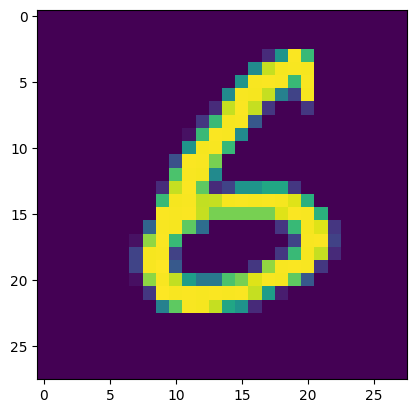

In [8]:
n=random.randint(0,999)
plt.imshow(x_test[n])
plt.show()

In [9]:
prediction=model.predict(x_test)
print("The handwritten number in the image is %d"%np.argmax(prediction[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
The handwritten number in the image is 6
